<a href="https://colab.research.google.com/github/MartaSolarz/Computational_Mathematics/blob/main/Lab5MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

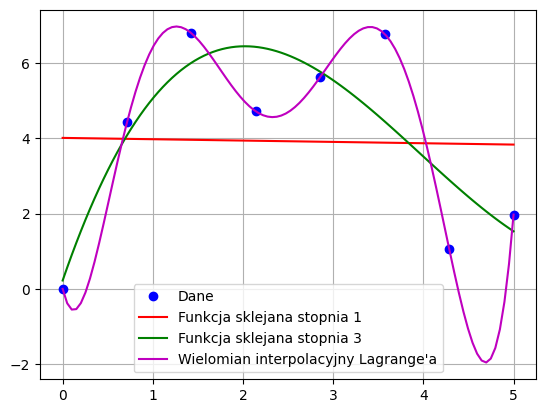

In [6]:
# ZADANIE 5.2
# Wczytanie danych
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

data = np.loadtxt('interpolacjaorazlznk3.csv', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

# Funkcja sklejana stopnia 1
coefficients = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coefficients)

# Funkcja sklejana stopnia 3
coefficients = np.polyfit(x, y, deg=3)
poly3d_fn = np.poly1d(coefficients)

# Wielomian interpolacyjny Lagrange'a
poly_lagrange = lagrange(x, y)

# Generowanie punktów dla wykresu
x_new = np.linspace(x[0], x[-1], 100)
y_poly1d = poly1d_fn(x_new)
y_poly3d = poly3d_fn(x_new)
y_lagrange = poly_lagrange(x_new)

# Rysowanie wykresu
plt.plot(x, y, 'bo', label='Dane')
plt.plot(x_new, y_poly1d, 'r-', label='Funkcja sklejana stopnia 1')
plt.plot(x_new, y_poly3d, 'g-', label='Funkcja sklejana stopnia 3')
plt.plot(x_new, y_lagrange, 'm-', label='Wielomian interpolacyjny Lagrange\'a')
plt.legend()
plt.grid()
plt.show()



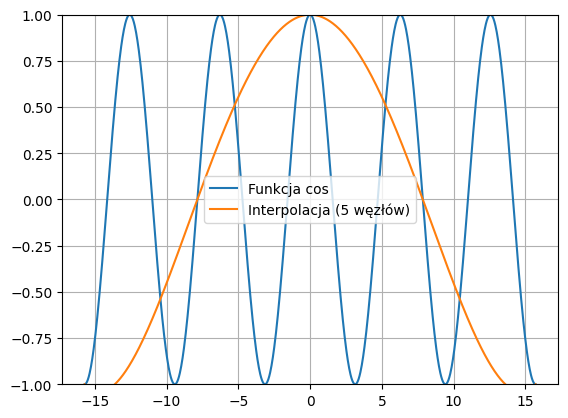

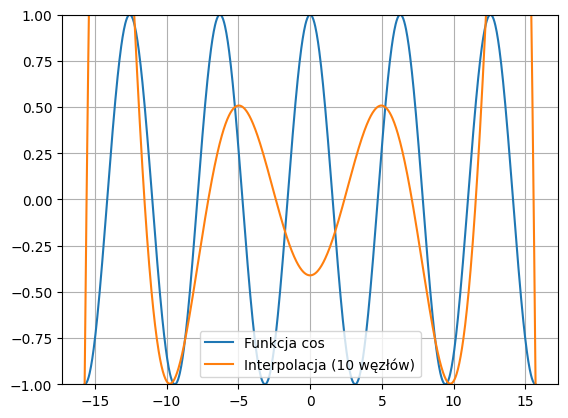

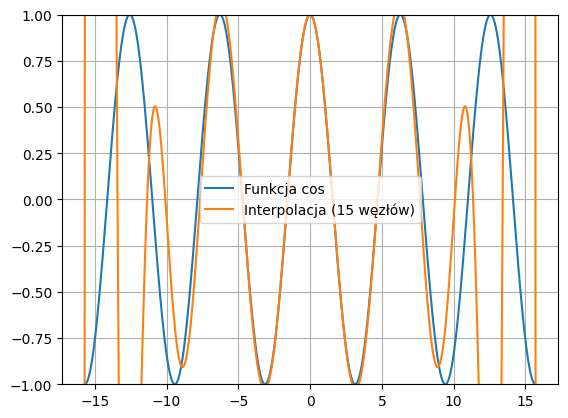

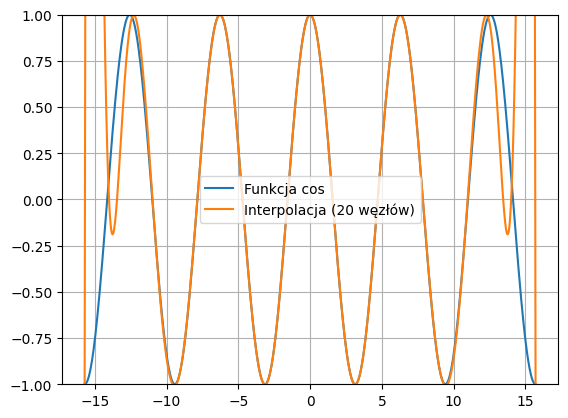

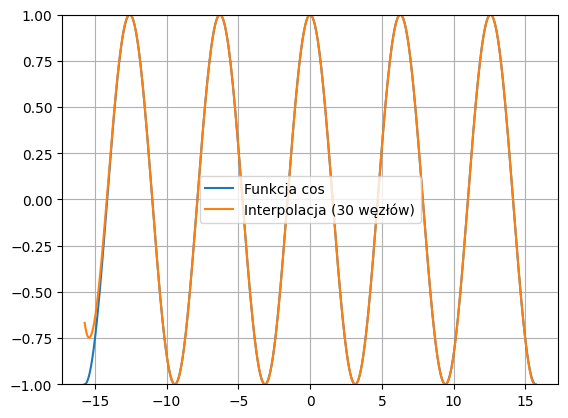

Ilość węzłów potrzebna do uzyskania błędu mniejszego niż 0.1: 27


In [16]:
# ZADANIE 5.3
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def f(x):
    return np.cos(x)

x = np.linspace(-5 * np.pi, 5 * np.pi, 1000)
y = f(x)


num_nodes = [5, 10, 15, 20, 30]  # Różne ilości węzłów

for num in num_nodes:
    x_nodes = np.linspace(-5 * np.pi, 5 * np.pi, num)
    y_nodes = f(x_nodes)
    plt.ylim(-1,1)

    poly_lagrange = lagrange(x_nodes, y_nodes)
    y_interpolated = poly_lagrange(x)

    plt.plot(x, y, label='Funkcja cos')
    plt.plot(x, y_interpolated, label=f'Interpolacja ({num} węzłów)')
    plt.legend()
    plt.grid()
    plt.show()

error_threshold = 0.1
num_nodes = 2
previous_error = np.inf

while True:
    x_nodes = np.linspace(-5 * np.pi, 5 * np.pi, num_nodes)
    y_nodes = f(x_nodes)

    poly_lagrange = lagrange(x_nodes, y_nodes)
    y_interpolated = poly_lagrange(x)

    current_error = np.max(np.abs(y_interpolated - y))
    if current_error < error_threshold:
        break

    num_nodes += 1
    previous_error = current_error

print(f"Ilość węzłów potrzebna do uzyskania błędu mniejszego niż 0.1: {num_nodes}")
